In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Intro

Let's start with loading and quickly analysing the data

In [6]:
DATA_PATH = "../data/bank_train.csv"

df = pd.read_csv(DATA_PATH)
df.head(5)

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
# Number of rows
len(df)

165034

In [8]:
# Perfectly clean data, special.
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
from ydata_profiling import ProfileReport

df_profile = ProfileReport(df=df, title="Bank churn report")
df_profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\trhaa\OneDrive\Documenten\Python\MLE_demo\mle_demo\venv\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Male'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df_profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df_profile.to_file("../notebooks/profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

There are only two categorical vars, Geography and Gender. Because these only have 3 and 2 categories respectively, we can one-hot encode them (and simply binary encode the gender).

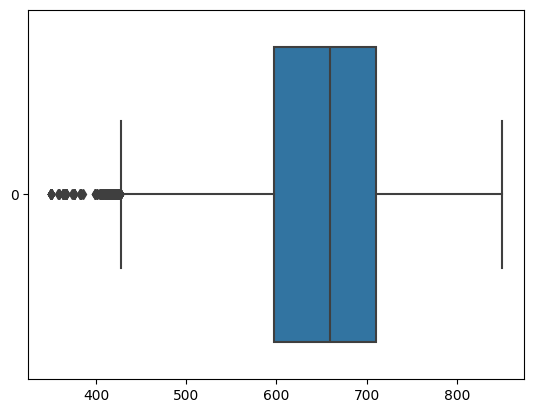

In [20]:
NUMERICAL_VARS = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
CATEGORICAL_VARS = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']
TARGET_VAR = 'Exited'


sns.boxplot(df[NUMERICAL_VARS[0]], orient='h', )
plt.show()

c:\Users\trhaa\OneDrive\Documenten\Python\MLE_demo\mle_demo\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\trhaa\OneDrive\Documenten\Python\MLE_demo\mle_demo\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\trhaa\OneDrive\Documenten\Python\MLE_demo\mle_demo\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\trhaa\OneDrive\Documenten\Python\MLE_demo\mle_demo\venv\Lib\site-packages

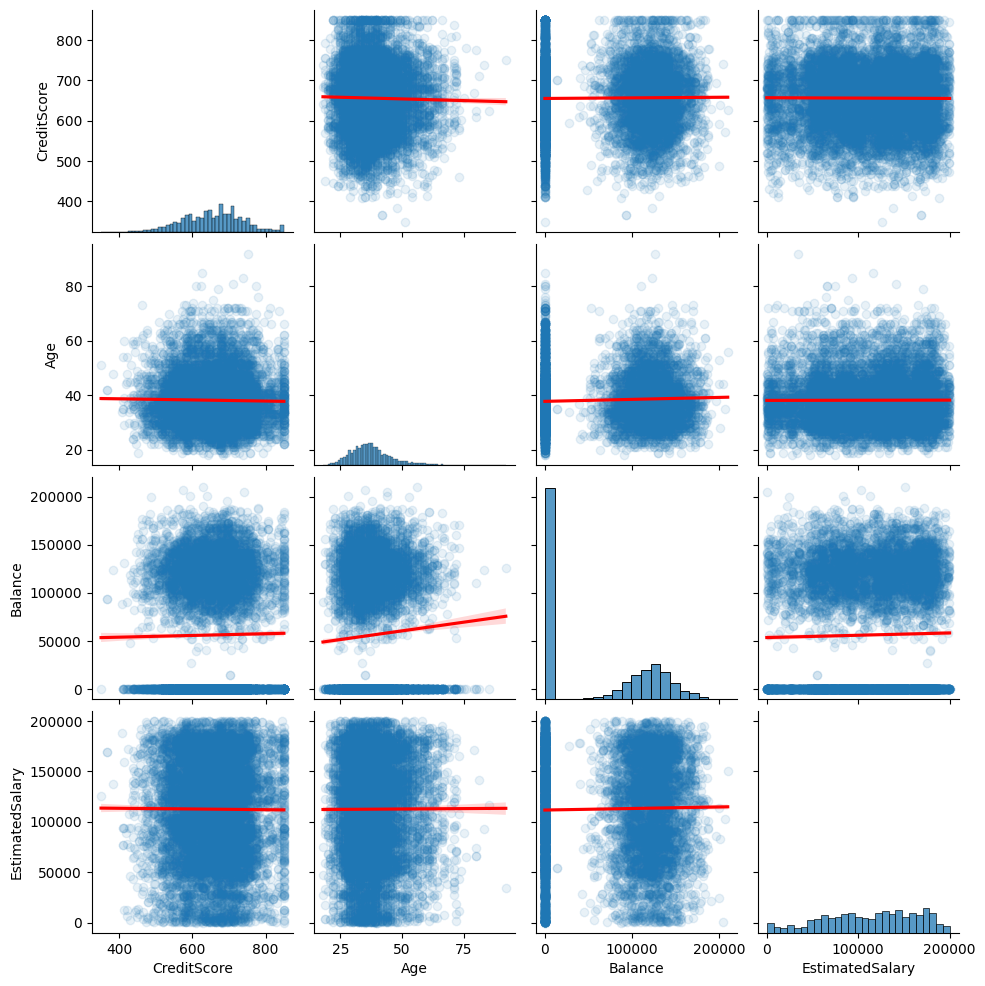

: 

In [28]:
sns.pairplot(df[NUMERICAL_VARS].sample(10000), kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()